# Exploratory Data Analysis - Demography

In [120]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
import seaborn as sns

import time

import math
import scipy.stats as stats

In [121]:
# enrollment = pd.read_csv('Cleaned Datasets/cleaned_enrollment.csv')
# biometric = pd.read_csv('Cleaned Datasets/cleaned_biometric.csv')
demography = pd.read_csv('Cleaned Datasets/cleaned_demographic.csv')

os.makedirs('Demography Images', exist_ok=True)

print("Successfully loaded the Cleaned Datasets")

Successfully loaded the Cleaned Datasets


## 1. Analysing Enrollment Data

In [123]:
demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071698 entries, 0 to 2071697
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17+   int64 
 6   total_updates  int64 
dtypes: int64(4), object(3)
memory usage: 110.6+ MB


In [124]:
demography['date'] = pd.to_datetime(demography['date'])
demography.rename(columns={"demo_age_17_": "demo_age_17+"}, inplace=True)
demography['pincode'] = demography['pincode'].astype(str)

demography.to_csv("Cleaned Datasets/cleaned_demographic.csv", index=False)

In [125]:
demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071698 entries, 0 to 2071697
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   state          object        
 2   district       object        
 3   pincode        object        
 4   demo_age_5_17  int64         
 5   demo_age_17+   int64         
 6   total_updates  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 110.6+ MB


In [126]:
demography.describe(include='all')

,date,state,district,pincode,demo_age_5_17,demo_age_17+,total_updates
count,2071698,2071698,2071698,2071698,2.071698e+06,2.071698e+06,2.071698e+06
unique,NaN,36,848,19741,NaN,NaN,NaN
top,NaN,Andhra Pradesh,Anantapur,533464,NaN,NaN,NaN
freq,NaN,207742,19696,488,NaN,NaN,NaN
mean,2025-11-02 19:25:02.409327872,NaN,NaN,NaN,2.347555e+00,2.144703e+01,2.379458e+01
min,2025-03-01 00:00:00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,2025-10-15 00:00:00,NaN,NaN,NaN,0.000000e+00,2.000000e+00,3.000000e+00
50%,2025-11-08 00:00:00,NaN,NaN,NaN,1.000000e+00,6.000000e+00,7.000000e+00
75%,2025-12-06 00:00:00,NaN,NaN,NaN,2.000000e+00,1.500000e+01,1.700000e+01
max,2025-12-29 00:00:00,NaN,NaN,NaN,2.690000e+03,1.616600e+04,1.694200e+04


In [127]:
demography.head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17+,total_updates
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,578
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,397
2,2025-03-01,Gujarat,Rajkot,360006,65,765,830
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,338
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,830
5,2025-03-01,Rajasthan,Sikar,332028,28,285,313
6,2025-03-01,Karnataka,Tumakuru,572201,88,332,420
7,2025-03-01,Uttar Pradesh,Gorakhpur,273211,61,836,897
8,2025-03-01,Andhra Pradesh,Kurnool,518313,83,986,1069
9,2025-03-01,West Bengal,Paschim Medinipur,721148,13,281,294


In [128]:
def validate_sample_significance(df, target_col, n, confidence=0.95):
    """
    Validates if a sample size n is statistically significant for a given target column.
    """
    N = len(df)
    
    # 1. Calculate Population Statistics
    sigma = df[target_col].std()
    mu = df[target_col].mean()
    
    # Safety Check: If mean is 0, we can't calculate relative error
    if mu == 0:
        print(f"SKIPPING '{target_col}': Mean is 0, cannot calculate relative error.")
        return

    # 2. Calculate Margin of Error (Finite Population Correction included)
    z_score = stats.norm.ppf((1 + confidence) / 2)
    standard_error = (sigma / math.sqrt(n)) * math.sqrt((N - n) / (N - 1))
    
    moe_absolute = z_score * standard_error
    moe_relative = (moe_absolute / mu) * 100
    
    # 3. Report
    print(f"VALIDATION REPORT for '{target_col}'")
    print(f"Population Mean: {mu:.2f} | Std Dev: {sigma:.2f}")
    print(f"Sample Size: {n:,} ({(n/N)*100:.1f}% of data)")
    print(f"Margin of Error: ±{moe_relative:.2f}% (at {confidence*100:.0f}% confidence)")
    
    if moe_relative < 5:
        print("STATUS: EXCELLENT (High Precision)")
    elif moe_relative < 10:
        print("STATUS: ACCEPTABLE (Good for General Trends)")
    else:
        print("STATUS: CAUTION (High Variance / Insufficient Sample)")
    print("-" * 40)

In [129]:
# --- USAGE FOR DEMOGRAPHY DATASET ---

# Define the sample size you are planning to use (e.g., 10% or a fixed number like 50k)
# Given you have 2M rows, a 50,000 sample is usually very robust.
sample_size = 20000 

# Run validation on your key numerical columns
print(f"checking sample validity for N={sample_size}...\n")

validate_sample_significance(demography, 'total_updates', sample_size)
validate_sample_significance(demography, 'demo_age_5_17', sample_size)
validate_sample_significance(demography, 'demo_age_17+', sample_size)

checking sample validity for N=20000...

VALIDATION REPORT for 'total_updates'
Population Mean: 23.79 | Std Dev: 138.20
Sample Size: 20,000 (1.0% of data)
Margin of Error: ±8.01% (at 95% confidence)
STATUS: ACCEPTABLE (Good for General Trends)
----------------------------------------
VALIDATION REPORT for 'demo_age_5_17'
Population Mean: 2.35 | Std Dev: 14.90
Sample Size: 20,000 (1.0% of data)
Margin of Error: ±8.76% (at 95% confidence)
STATUS: ACCEPTABLE (Good for General Trends)
----------------------------------------
VALIDATION REPORT for 'demo_age_17+'
Population Mean: 21.45 | Std Dev: 125.25
Sample Size: 20,000 (1.0% of data)
Margin of Error: ±8.05% (at 95% confidence)
STATUS: ACCEPTABLE (Good for General Trends)
----------------------------------------


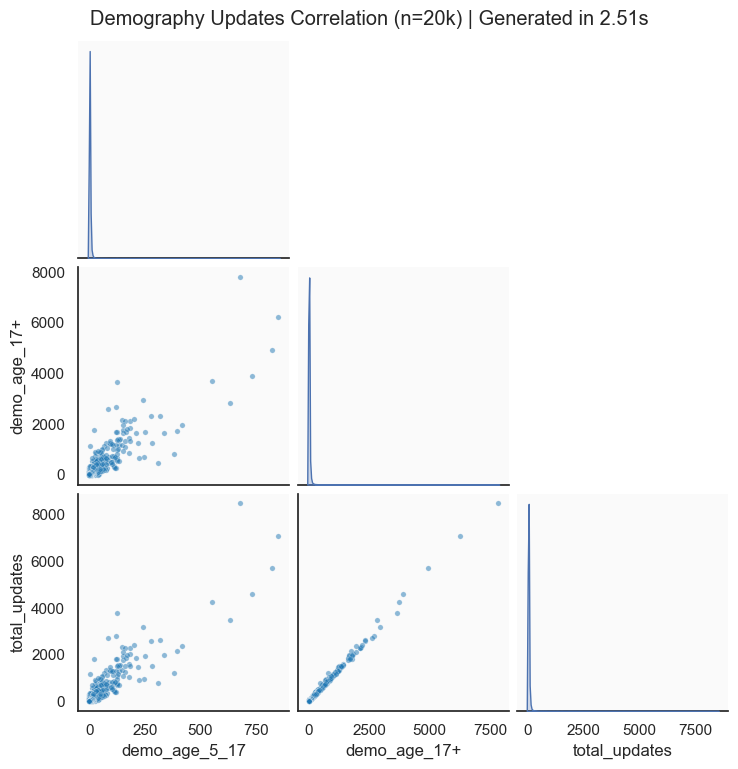

In [130]:
# Generate the Plot
start_time = time.time()

# Sample from the NEW 'demography' dataset
demography_sample = demography.sample(n=20000, random_state=42)

sns.pairplot(
    demography_sample,
    # UPDATE: Use the correct columns from the 'demography' dataset schema
    vars=['demo_age_5_17', 'demo_age_17+', 'total_updates'],
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.5, 's': 15, 'color': '#1f77b4'}
)

plt.suptitle(f'Demography Updates Correlation (n=20k) | Generated in {time.time() - start_time:.2f}s', y=1.02)
plt.show()

In [131]:
# Check if the sum of parts equals the total
sum_check = (demography['demo_age_5_17'] + demography['demo_age_17+']) == demography['total_updates']
mismatches = len(demography) - sum_check.sum() 

print(f"Number of rows with inconsistent totals: {mismatches}")

Number of rows with inconsistent totals: 0


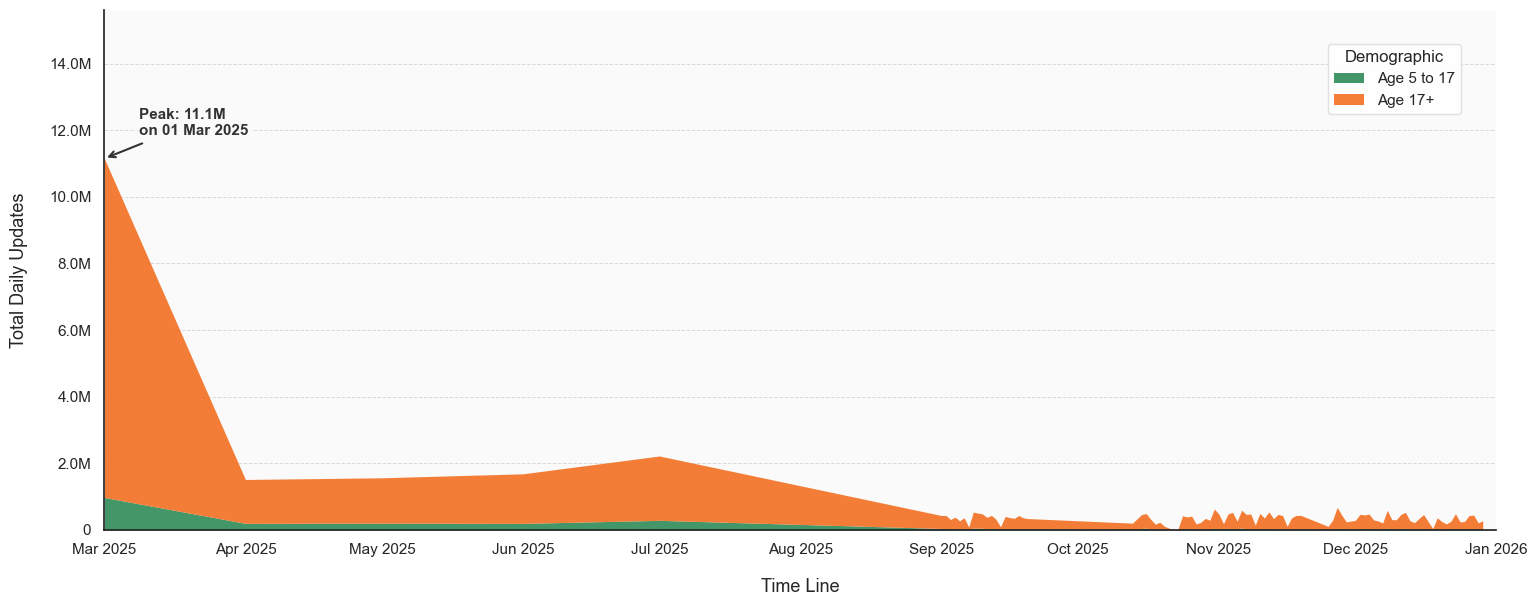

In [132]:
# --- Helper Function for Dynamic Formatting (K and M) ---
def format_km(n, pos=None):
    if n >= 1_000_000:
        return f'{n/1_000_000:.1f}M'
    elif n >= 1_000:
        return f'{n/1_000:.0f}K'  # Removed decimal for cleaner K labels
    return f'{n:.0f}'

# Set style
sns.set_theme(style="white", rc={"axes.facecolor": "#fafafa"})

# --- Data Processing ---
# (Assuming 'demography' dataframe exists)
demography['date'] = pd.to_datetime(demography['date'])
daily_trend = demography.groupby('date')[['demo_age_5_17', 'demo_age_17+']].sum()
daily_trend.columns = ['Age 5 to 17', 'Age 17+']

# --- Plotting ---
fig, ax = plt.subplots(figsize=(16, 8))

# --- UPDATE: Change colors to Green ---
# Using two distinct shades of green for the stacked areas.
# Light green for the bottom layer, darker green for the top layer.
colors = ['#2E8B57', '#F37021']

# Area Plot
daily_trend.plot(kind='area', stacked=True, alpha=0.9, ax=ax, color=colors, linewidth=0)

# --- Dynamic Titles ---
# (Commented out as in your provided code)
#fig.text(x=0.08, y=0.96, s='Daily Demographic Update Volume', 
#         fontsize=22, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s=f"Cumulative daily updates breakdown ({daily_trend.index.min().strftime('%b %y')} - {daily_trend.index.max().strftime('%b %y')})", 
#         fontsize=14, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- Legend placement (Anti-Overlap) ---
ax.legend(title='Demographic', title_fontsize='12', fontsize='11',
          loc='upper right', bbox_to_anchor=(0.98, 0.95), 
          frameon=True, framealpha=0.9, facecolor='white', edgecolor='#dddddd')

# --- Limits & Headroom ---
total_daily = daily_trend.sum(axis=1)
peak_value = total_daily.max()
peak_date = total_daily.idxmax()

ax.set_ylim(0, peak_value * 1.4 if peak_value > 0 else 100)
ax.margins(x=0)
ax.set_xlim(pd.Timestamp('2025-03-01'), pd.Timestamp('2026-01-01'))

# --- FIX: Date Formatting (Month Name + Year) ---
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # 'Mar 2025' format

# --- Y-Axis Formatting ---
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_km))

plt.xticks(rotation=0, ha='center', fontsize=11)
plt.yticks(fontsize=11)

ax.set_ylabel('Total Daily Updates', fontsize=13, labelpad=15)
ax.set_xlabel('Time Line', fontsize=13, labelpad=15)

# Aesthetics
sns.despine()
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7, color='#cccccc', alpha=0.7)

# --- Annotation Overlap & Scale Handling ---
if peak_value > 0:
    peak_label = format_km(peak_value)
    # Update annotation date to use 3-char month
    peak_date_str = peak_date.strftime('%d %b %Y') 
    
    is_at_start = peak_date <= (daily_trend.index.min() + pd.Timedelta(days=7))
    
    ax.annotate(f'Peak: {peak_label}\non {peak_date_str}',
                xy=(peak_date, peak_value),
                xytext=(25 if is_at_start else 0, 15), 
                textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='#333333', lw=1.5),
                fontsize=11, color='#333333', 
                ha='left' if is_at_start else 'center',
                va='bottom', 
                fontweight='bold', 
                bbox=dict(boxstyle='round,pad=0.3', fc='#fafafa', ec='none', alpha=0.8))

# Layout Fine-tuning
plt.subplots_adjust(top=0.85, left=0.08, right=0.95)

# Save
plt.savefig('Demography Images/Demography_updates_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

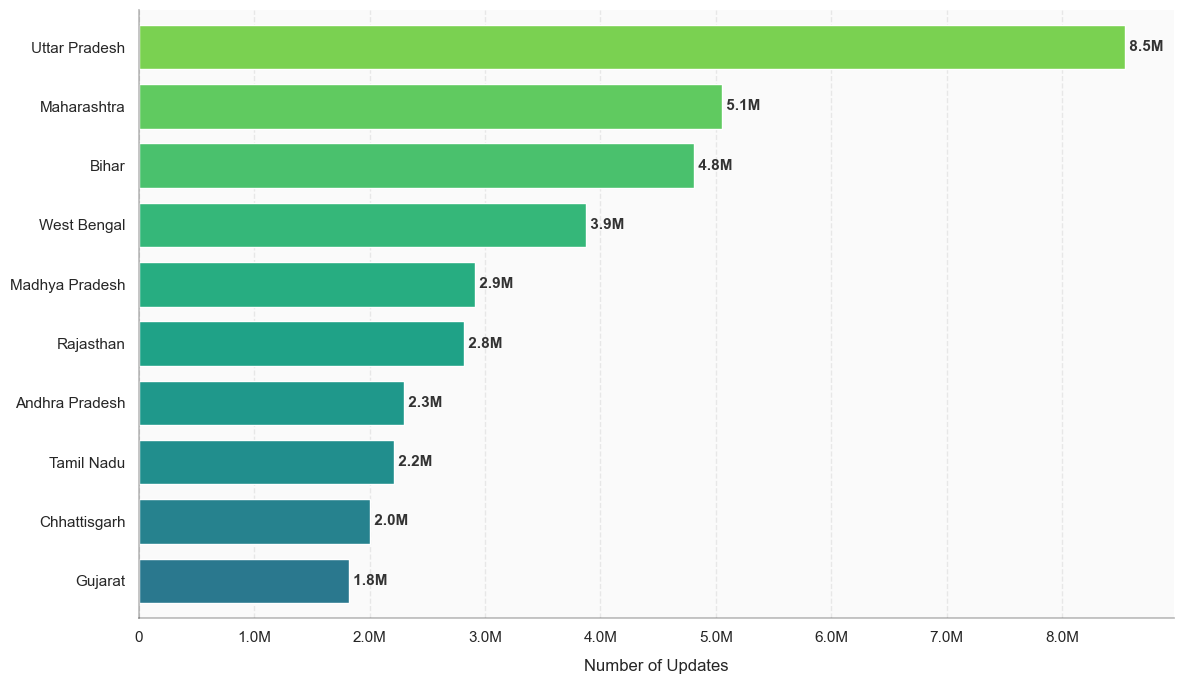

In [133]:
# --- Data Preparation ---
# Calculate total updates per state (summing both demographics)
demography['total_updates_sum'] = demography['demo_age_5_17'] + demography['demo_age_17+']
top_states_demo = demography.groupby('state')['total_updates_sum'].sum().nlargest(10).sort_values()

# --- Plotting ---
plt.figure(figsize=(12, 7))

# Generate gradient colors (Viridis is great for accessibility)
colors = cm.viridis(np.linspace(0.4, 0.8, len(top_states_demo)))

# Plot
ax = top_states_demo.plot(kind='barh', color=colors, width=0.75)

# Titles & Labels
# plt.title('Top 10 States by Demographic Update Volume', fontsize=16, fontweight='bold', pad=20, loc='left')
plt.xlabel('Number of Updates', fontsize=12, labelpad=10)
plt.ylabel('') 
plt.grid(axis='x', linestyle='--', alpha=0.4)

# --- Format X-Axis Ticks (Dynamic K/M) ---
def human_format_axis(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(human_format_axis))

# --- Add Value Labels ---
for index, value in enumerate(top_states_demo):
    if value >= 1_000_000:
        label = f' {value/1_000_000:.1f}M'
    elif value >= 1_000:
        label = f' {value/1_000:.0f}K' # Using .0f for cleaner labels inside/beside bars
    else:
        label = f' {int(value)}'
    
    # Position text slightly to the right of the bar end
    plt.text(value, index, label, va='center', fontsize=11, fontweight='bold', color='#333333')

# Clean up aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)
ax.spines['left'].set_alpha(0.3)

plt.tight_layout()

# Updated directory and filename for Demography
plt.savefig('Demography Images/Top_states_demographic_updates.png', dpi=300, bbox_inches='tight')
plt.show()

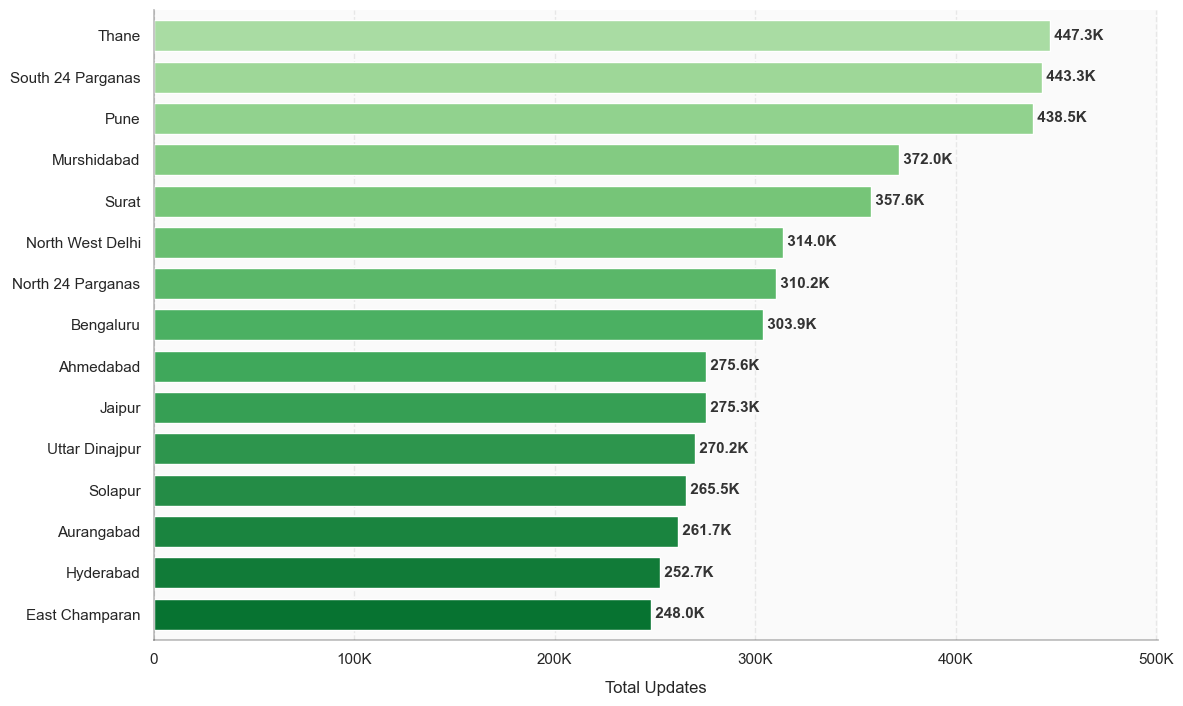

In [134]:
# --- Data Preparation ---
# Grouping by district and summing the demographic update columns
demography['total_updates'] = demography['demo_age_5_17'] + demography['demo_age_17+']
top_districts = demography.groupby('district')['total_updates'].sum().nlargest(15).sort_values()

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 8))

# Generate gradient colors
colors = cm.Greens(np.linspace(0.85, 0.35, len(top_districts)))

# Plot
top_districts.plot(kind='barh', color=colors, width=0.75, ax=ax)

# --- Dynamic Titles ---
#fig.text(x=0.08, y=0.96, s='Top 15 Districts by Demographic Update Volume', 
#         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s='Combined updates and corrections for all age groups', 
#         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- Formatting ---
plt.xlabel('Total Updates', fontsize=12, labelpad=10)
plt.ylabel('') 
plt.grid(axis='x', linestyle='--', alpha=0.4)

# --- Format X-Axis Ticks (M/K) ---
def human_format_axis(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    return str(int(x))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(human_format_axis))

# --- Add Value Labels (with collision safety) ---
max_val = top_districts.max()
for index, value in enumerate(top_districts):
    if value >= 1_000_000:
        label = f' {value/1_000_000:.1f}M'
    elif value >= 1_000:
        label = f' {value/1_000:.1f}K'
    else:
        label = f' {int(value)}'
    
    # Position text with fixed padding rather than percentage to prevent drift
    plt.text(value, index, label, va='center', fontsize=11, fontweight='bold', color='#333333')

# --- Aesthetics & Layout ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)
ax.spines['left'].set_alpha(0.3)

# Expand the x-limit slightly to ensure labels have room on the right
ax.set_xlim(0, max_val * 1.12)

plt.tight_layout()
plt.subplots_adjust(top=0.88) # Make room for the custom figure titles

# Updated Save Path
plt.savefig('Demography Images/Demography_top_districts_bar.png', dpi=300, bbox_inches='tight')
plt.show()

In [135]:
print(demography['date'].dtype)

datetime64[ns]


In [136]:
print(f"{round(demography['total_updates'].sum()/10**6, 2)}M")

49.3M


C:\Users\priya\AppData\Local\Temp\ipykernel_21168\3399630657.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


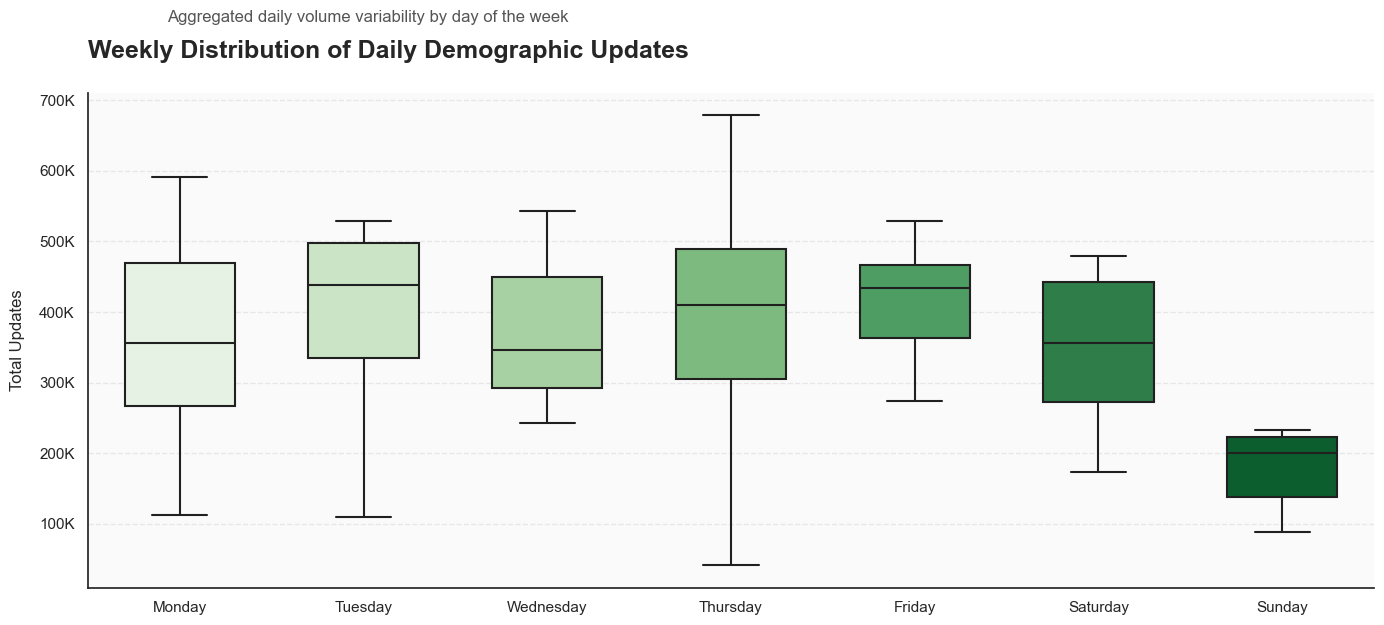

In [137]:
# --- 1. Fix the missing column and Aggregate ---
demography['date'] = pd.to_datetime(demography['date'])

# CREATE the Day_Name column first
demography['Day_Name'] = demography['date'].dt.day_name()

# Calculate total updates
demography['total_daily_sum'] = demography['demo_age_5_17'] + demography['demo_age_17+']

# Now the groupby will work because 'Day_Name' exists
daily_totals = demography.groupby(['date', 'Day_Name'])['total_daily_sum'].sum().reset_index()

# --- 2. Plotting ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(14, 7))

# Green gradient palette for consistency
sns.boxplot(
    data=daily_totals,
    x='Day_Name', 
    y='total_daily_sum', 
    order=day_order, 
    palette='Greens', 
    showfliers=False, 
    width=0.6,
    linewidth=1.5
)

# --- Formatting ---
plt.title('Weekly Distribution of Daily Demographic Updates', fontsize=18, fontweight='bold', pad=25, loc='left')
plt.suptitle('Aggregated daily volume variability by day of the week', 
             fontsize=12, color='#555555', x=0.125, y=0.92, ha='left')

plt.ylabel('Total Updates', fontsize=12, labelpad=10)
plt.xlabel('')

# Helper for K/M labels
def human_format(x, pos):
    if x >= 1_000_000: return f'{x/1_000_000:.1f}M'
    if x >= 1_000: return f'{x/1_000:.0f}K'
    return str(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

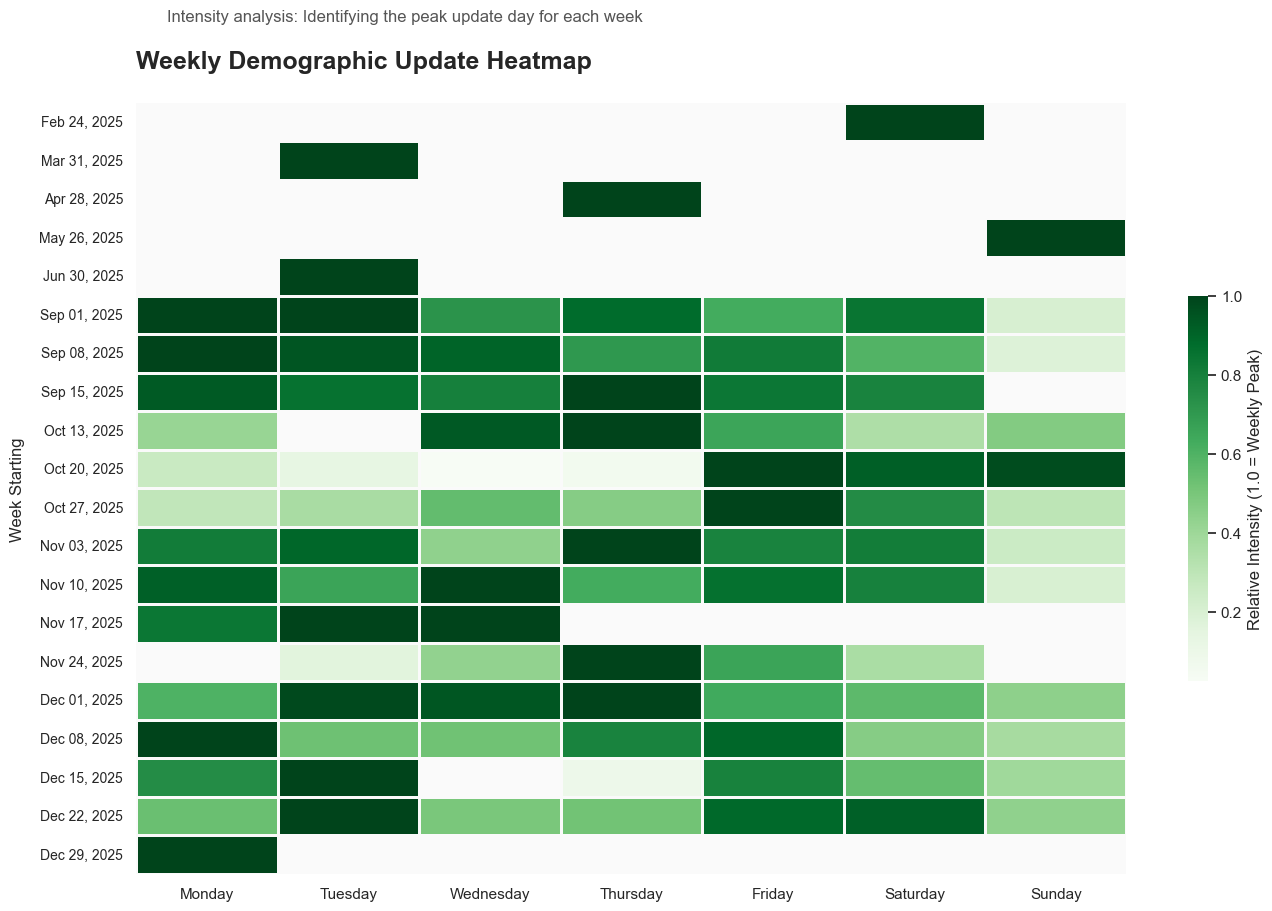

In [138]:
# --- 1. Data Processing & Aggregation ---
# Ensure date is datetime and columns exist
demography['date'] = pd.to_datetime(demography['date'])
demography['Day_Name'] = demography['date'].dt.day_name()
demography['total_daily_sum'] = demography['demo_age_5_17'] + demography['demo_age_17+']

# Create Week_Start and group by date to get daily totals across all regions/districts
demography['Week_Start'] = demography['date'].dt.to_period('W').apply(lambda r: r.start_time)
daily_aggregated = demography.groupby(['Week_Start', 'Day_Name'])['total_daily_sum'].sum().reset_index()

# Pivot the data
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pivot = daily_aggregated.pivot_table(index='Week_Start', columns='Day_Name', values='total_daily_sum', aggfunc='sum')
weekly_pivot = weekly_pivot.reindex(columns=day_order)

# --- 2. Normalize (Row-wise) ---
# Highlights which day of each specific week had the most activity (1.0 = Max)
weekly_normalized = weekly_pivot.div(weekly_pivot.max(axis=1), axis=0)

# --- 3. Plotting ---
plt.figure(figsize=(14, 10))

# Format Y-axis labels: "Mar 02, 2025"
yticklabels = [date.strftime('%b %d, %Y') for date in weekly_normalized.index]

sns.heatmap(
    weekly_normalized, 
    cmap='Greens', 
    linewidths=0.8, 
    linecolor='#fafafa',
    yticklabels=yticklabels,
    cbar_kws={'label': 'Relative Intensity (1.0 = Weekly Peak)', 'shrink': 0.5}
)

# --- Formatting ---
plt.title('Weekly Demographic Update Heatmap', fontsize=18, fontweight='bold', pad=25, loc='left')
plt.suptitle('Intensity analysis: Identifying the peak update day for each week', 
             fontsize=12, color='#555555', x=0.125, y=0.94, ha='left')

plt.ylabel('Week Starting', fontsize=12, labelpad=10)
plt.xlabel('')
plt.xticks(rotation=0, fontsize=11) 
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_21168\810410472.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  days = day_counts[i]


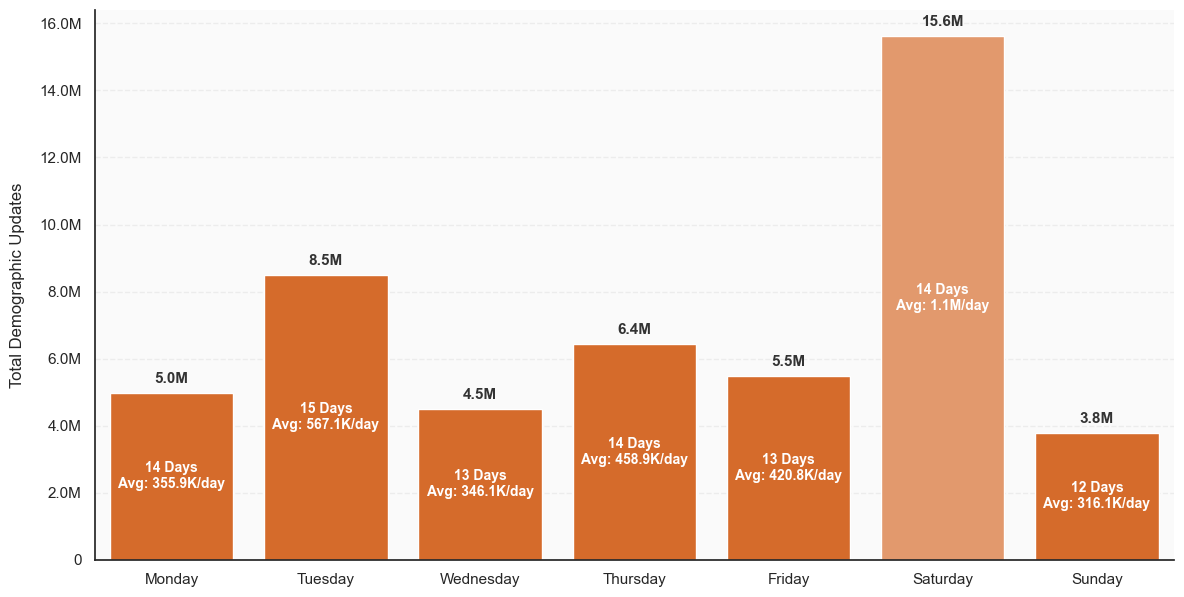

In [139]:
# --- 1. Data Preparation ---
# Ensure Day_Name and total volume columns exist
demography['date'] = pd.to_datetime(demography['date'])
demography['Day_Name'] = demography['date'].dt.day_name()
demography['total_updates'] = demography['demo_age_5_17'] + demography['demo_age_17+']

# Aggregation
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sums = demography.groupby('Day_Name')['total_updates'].sum().reindex(day_order)
day_counts = demography.groupby('Day_Name')['date'].nunique().reindex(day_order)

# --- 2. Helper Function for M/K Formatting ---
def human_format(num, pos=None):
    if num >= 1_000_000:
        return f'{num/1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num/1_000:.1f}K'
    else:
        return str(int(num))

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(12, 7))

# Identify max value for color highlighting (Aadhaar Theme)
# Peak Day = Aadhaar Orange, Other Days = Aadhaar Green
max_value = daily_sums.max()
colors = ['#f69459' if x == max_value else '#f2640e' for x in daily_sums]

# Plot Bar Chart
sns.barplot(x=daily_sums.index, y=daily_sums.values, palette=colors, width=0.8, ax=ax, hue=daily_sums.index, legend=False)

# --- 4. Adding Dynamic Labels (M/K) ---
for i, p in enumerate(ax.patches):
    height = p.get_height()
    days = day_counts[i]
    avg = height / days if days > 0 else 0
    
    # A. Top Label: Total Volume (Dynamic M/K)
    vol_label = human_format(height)
    ax.annotate(vol_label, 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', xytext=(0, 5), 
                textcoords='offset points', fontsize=11, fontweight='bold', color='#333333')
    
    # B. Middle Label: Efficiency Stats
    avg_label = human_format(avg)
    
    if height > 0:
        info_text = f'{days} Days\nAvg: {avg_label}/day'
        ax.text(p.get_x() + p.get_width() / 2., height / 2, 
                info_text, ha='center', va='center', 
                color='white', fontsize=10, fontweight='bold')

# --- 5. Formatting & Titles ---
#fig.text(x=0.08, y=0.96, s='Day-wise Demographic Update Distribution', 
#         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s='Total volume and daily averages across the week (Aadhaar Branded)', 
#         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

plt.ylabel('Total Demographic Updates', fontsize=12, labelpad=10)
plt.xlabel('')

# Apply Dynamic Formatter to Y-Axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout for titles
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save to Demography folder
plt.savefig('Demography Images/Day_wise_demographic_updates.png', dpi=300, bbox_inches='tight')
plt.show()

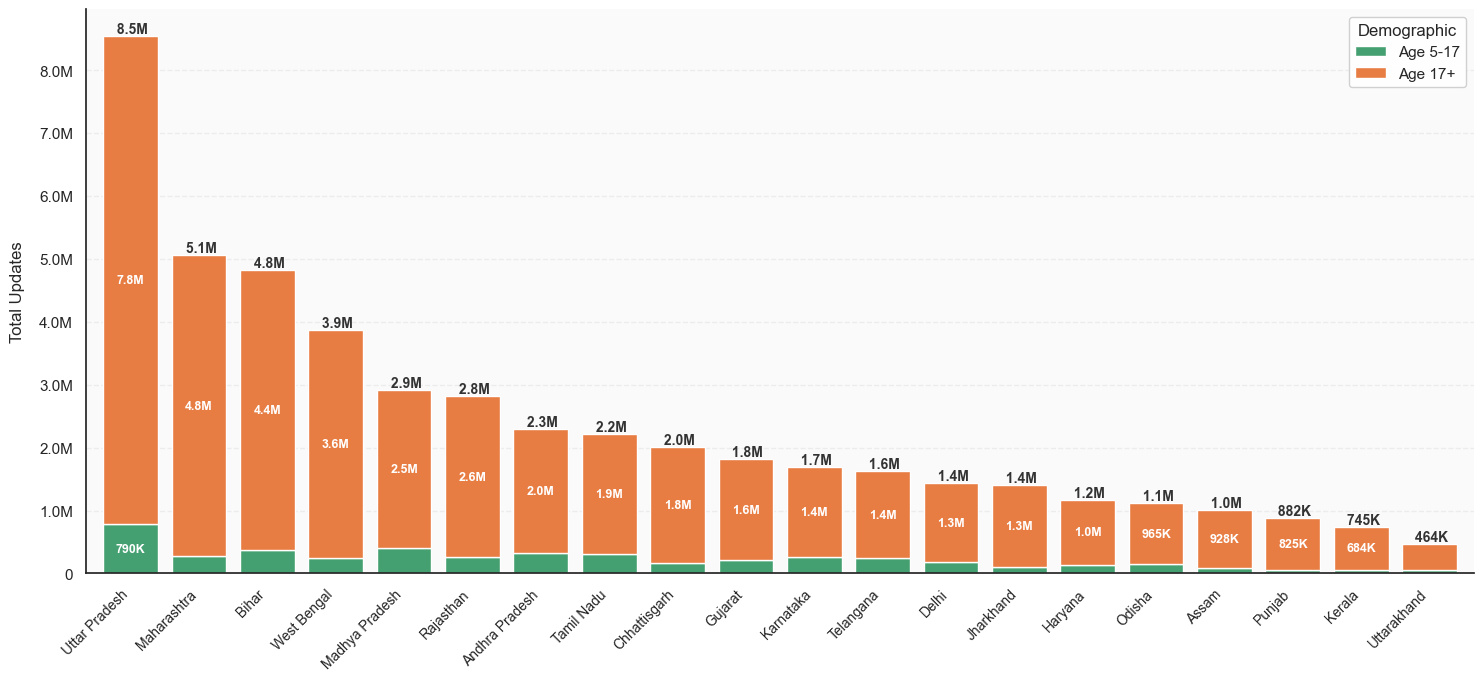

In [140]:
# --- 1. Data Preparation ---
# Demographic columns available in the dataset
age_cols = ['demo_age_5_17', 'demo_age_17+']

# Group by State and sum update volumes
state_group = demography.groupby('state')[age_cols].sum()

# Calculate Total for sorting
state_group['Total'] = state_group.sum(axis=1)

# Sort descending and take Top 20
state_group = state_group.sort_values('Total', ascending=False).head(20)

# Extract Totals for the Top Label logic
totals = state_group['Total'].values 

# Prepare data for plotting
plot_data = state_group.drop(columns='Total')
plot_data.columns = ['Age 5-17', 'Age 17+']

# --- 2. Helper Formatter (Dynamic K/M) ---
def human_format(num, pos=None):
    if num >= 1_000_000: return f'{num/1_000_000:.1f}M'
    if num >= 1_000: return f'{num/1_000:.0f}K'
    return f'{num:.0f}'

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(15, 8))

# UPDATE: Aadhaar Lighter Brand Colors
# Light Green for 5-17, Light Orange for 17+
brand_colors = ['#45A071', '#E87D43']

# Create Stacked Bar Chart
plot_data.plot(kind='bar', stacked=True, width=0.8, color=brand_colors, ax=ax)

# --- 4. Titles ---
#fig.text(x=0.08, y=0.96, s='State-wise Demographic Updates by Age Group', 
#         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s='Total volume breakdown for top 20 states (Aadhaar Light Theme)', 
#         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- 5. Logic for LABELS ---

# A. Inside Labels (Segments)
for container in ax.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()
        y_pos = bar.get_y()
        x_pos = bar.get_x()
        width = bar.get_width()
        
        # Only show label if the segment is large enough to contain text
        if height > (totals.max() * 0.06): 
            label_text = human_format(height)
            ax.text(x_pos + width/2, y_pos + height/2, label_text, 
                    ha='center', va='center', color='white', 
                    fontsize=9, fontweight='bold')

# B. Top Labels (Total Updates)
for i, total_val in enumerate(totals):
    label_text = human_format(total_val)
    ax.text(i, total_val, f' {label_text}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='#333333')

# --- 6. Styling ---
plt.ylabel('Total Updates', fontsize=12, labelpad=10)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Apply Formatter to Y-Axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Legend
plt.legend(title='Demographic', frameon=True, loc='upper right', facecolor='white', framealpha=0.9)

# Grid & Aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save to Demography folder
plt.savefig('Demography Images/State_Age_wise_updates_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

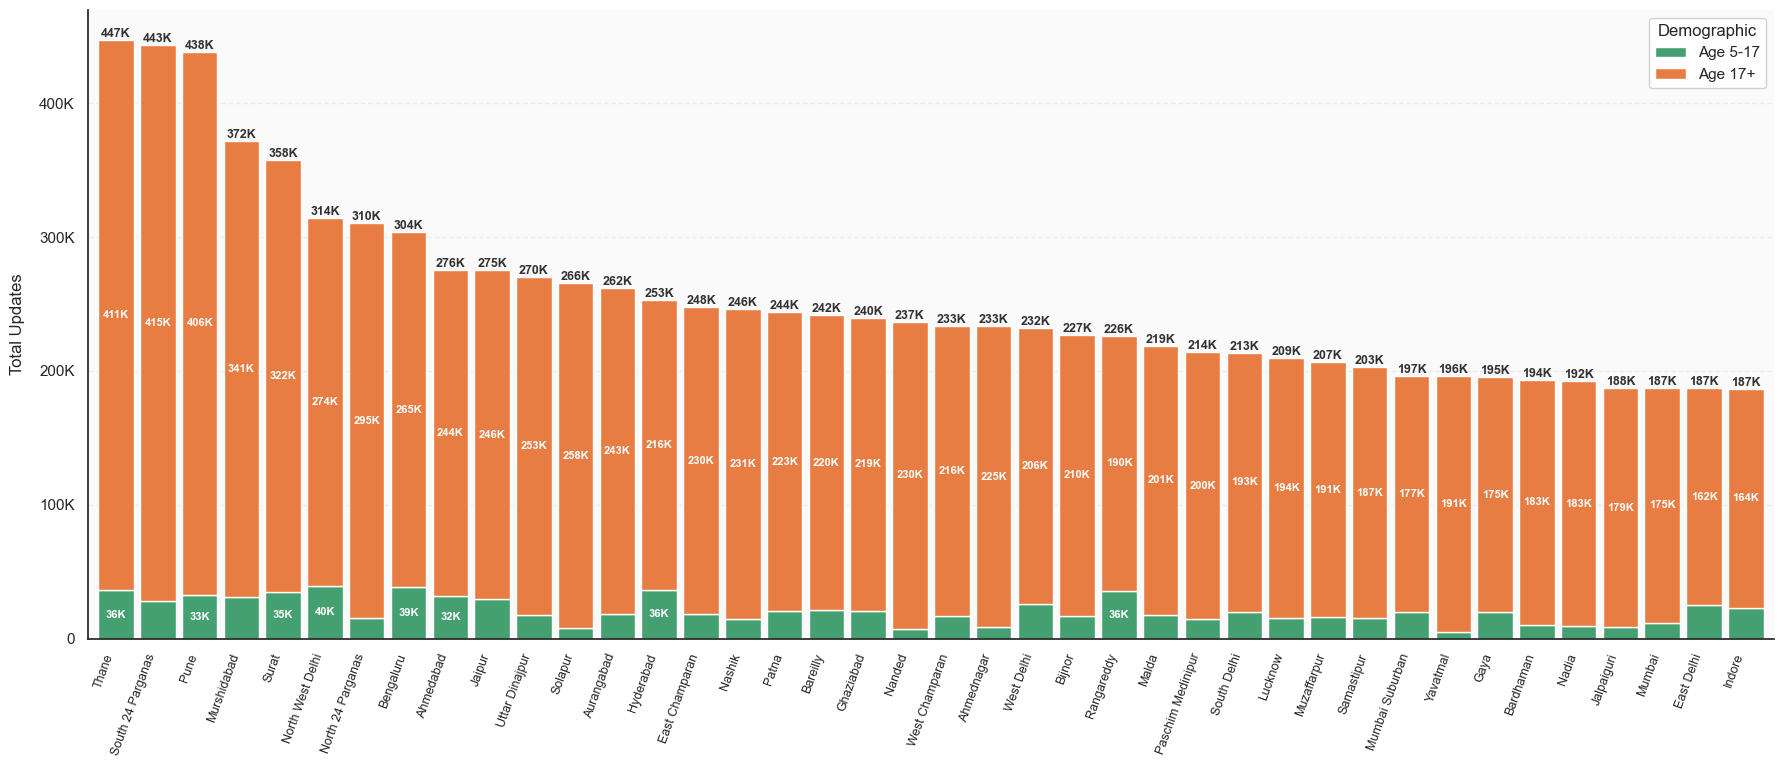

In [141]:
# --- 1. Data Preparation ---
# Update columns for Demography context
age_cols = ['demo_age_5_17', 'demo_age_17+']

# Check correct column name for District
group_col = 'district' if 'district' in demography.columns else 'District'

# Group and Sum
districts_group = demography.groupby(group_col)[age_cols].sum()

# Calculate 'Total' for sorting
districts_group['Total'] = districts_group.sum(axis=1)

# Sort descending and Keep Top 40
districts_group = districts_group.sort_values('Total', ascending=False).head(40)

# Save Totals for Thresholds & Top Labels
max_total = districts_group['Total'].max()
totals = districts_group['Total'].values

# Drop 'Total' for plotting
plot_data = districts_group.drop(columns='Total')
plot_data.columns = ['Age 5-17', 'Age 17+']

# --- 2. Helper Formatter (K/M) ---
def human_format(num, pos=None):
    if num >= 1_000_000: return f'{num/1_000_000:.1f}M'
    if num >= 1_000: return f'{num/1_000:.0f}K'
    return f'{num:.0f}'

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(18, 9)) # Slightly wider for 40 bars

# --- UPDATE: Deepened Aadhaar Brand Colors ---
brand_colors = ['#45A071', '#E87D43'] 

# Create Stacked Bar Chart
plot_data.plot(kind='bar', stacked=True, width=0.85, color=brand_colors, ax=ax)

# --- 4. Titles ---
#fig.text(x=0.08, y=0.96, s='District-wise Demographic Update Breakdown (Top 40)', 
#         fontsize=22, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s='Detailed age breakdown for highest volume districts (Deepened Aadhaar Theme)', 
#         fontsize=14, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- 5. LABEL LOGIC ---

# A. Internal Labels (Segments)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        
        # Only label if segment is > 7% of the tallest bar to avoid clutter
        if height > (max_total * 0.07): 
            label_text = human_format(height)
            ax.text(x + width/2, y + height/2, label_text, 
                    ha='center', va='center', color='white', 
                    fontsize=8, fontweight='bold')

# B. Top Labels (Totals)
for i, total_val in enumerate(totals):
    label_text = human_format(total_val)
    ax.text(i, total_val, label_text, 
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='#333333', rotation=0)

# --- 6. Styling ---
plt.ylabel('Total Updates', fontsize=12, labelpad=10)
plt.xlabel('')
plt.xticks(rotation=70, ha='right', fontsize=9)

# Apply Formatter to Y-Axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Legend
plt.legend(title='Demographic', frameon=True, loc='upper right', facecolor='white', framealpha=0.9)

# Grid & Spines
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save to Demography folder
plt.savefig('Demography Images/District_Age_wise_updates_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

Pareto Insight: The top 337 districts account for 80% of total demographic updates.


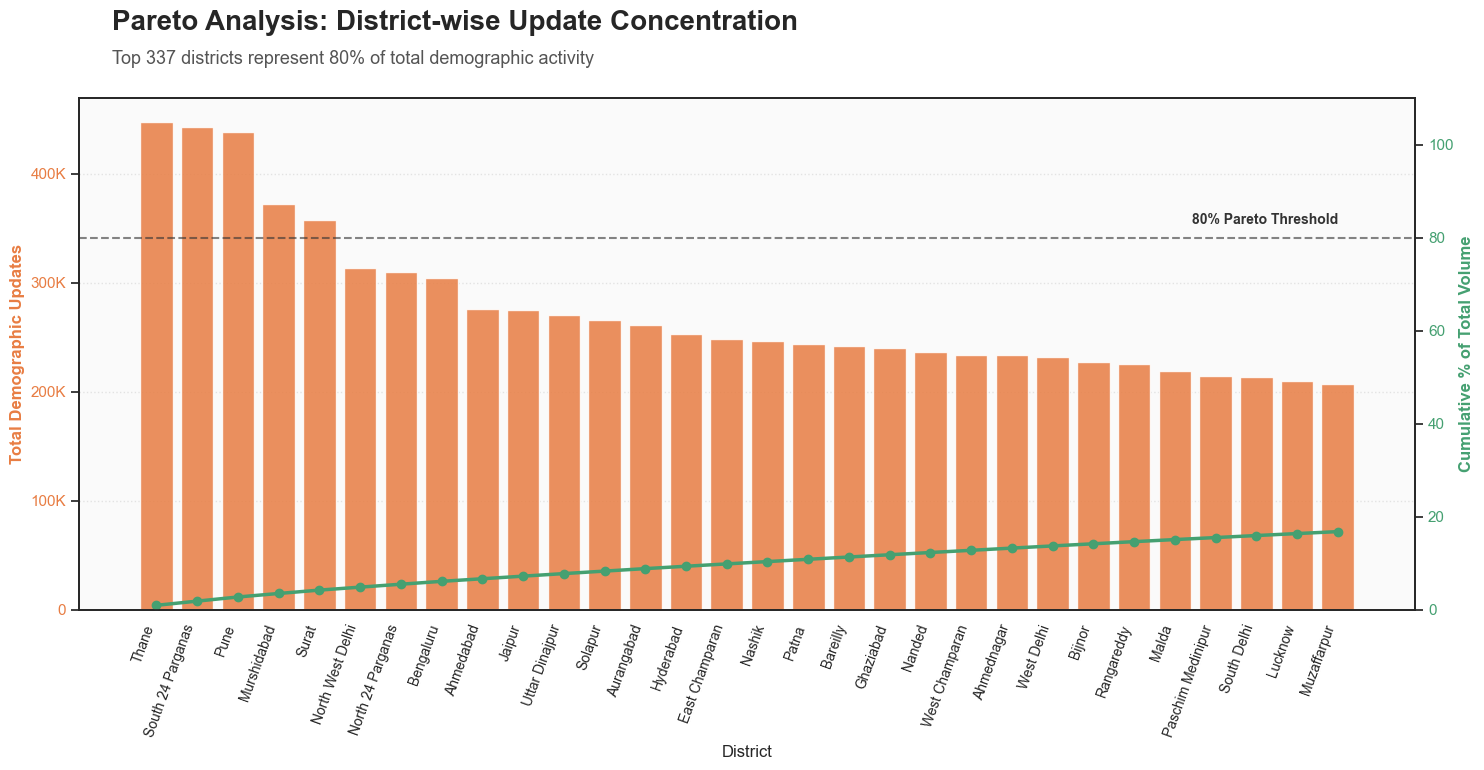

In [142]:
# --- 1. Data Preparation ---
# Sum demographic updates per district
demography['total_updates'] = demography['demo_age_5_17'] + demography['demo_age_17+']
district_counts = demography.groupby('district')['total_updates'].sum().sort_values(ascending=False)
total_volume = district_counts.sum()

# Calculate Cumulative Percentage
cumulative_percent = district_counts.cumsum() / total_volume * 100

# Identify the "80% Cutoff"
cutoff_index = cumulative_percent[cumulative_percent <= 80].count()
print(f"Pareto Insight: The top {cutoff_index} districts account for 80% of total demographic updates.")

# --- 2. Plotting (Dual Axis) ---
fig, ax1 = plt.subplots(figsize=(15, 8))

# Show Top 30 for readability
top_n = 30
district_subset = district_counts.head(top_n)
cum_subset = cumulative_percent.head(top_n)

# Bar Chart (Volume) - Using Aadhaar Orange
ax1.bar(district_subset.index, district_subset.values, color='#E87D43', alpha=0.85, label='Update Volume')
ax1.set_ylabel('Total Demographic Updates', color='#E87D43', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#E87D43')
ax1.set_xlabel('District', fontsize=12)

# Format X-axis
ax1.set_xticks(range(len(district_subset)))
ax1.set_xticklabels(district_subset.index, rotation=70, ha='right', fontsize=10)

# Line Chart (Cumulative %) - Using Aadhaar Green
ax2 = ax1.twinx()
ax2.plot(district_subset.index, cum_subset.values, color='#45A071', marker='o', ms=6, linewidth=2.5, label='Cumulative %')
ax2.set_ylabel('Cumulative % of Total Volume', color='#45A071', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#45A071')
ax2.set_ylim(0, 110)

# --- 3. Formatting & Annotations ---
# 80% Reference Line
ax2.axhline(80, color='#333333', linestyle='--', linewidth=1.5, alpha=0.6)
ax2.annotate('80% Pareto Threshold', xy=(0, 80), xytext=(top_n-1, 83),
             color='#333333', ha='right', fontweight='bold', fontsize=10)

# Titles
fig.text(x=0.08, y=0.96, s=f'Pareto Analysis: District-wise Update Concentration', 
         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
fig.text(x=0.08, y=0.91, s=f'Top {cutoff_index} districts represent 80% of total demographic activity', 
         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# Helper for Y-axis K/M formatting
def human_format(x, pos):
    if x >= 1_000_000: return f'{x/1_000_000:.1f}M'
    if x >= 1_000: return f'{x/1_000:.0f}K'
    return str(int(x))

import matplotlib.ticker as ticker
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Aesthetics
ax1.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()

Top 11 states contribute to ~80% of total volume.


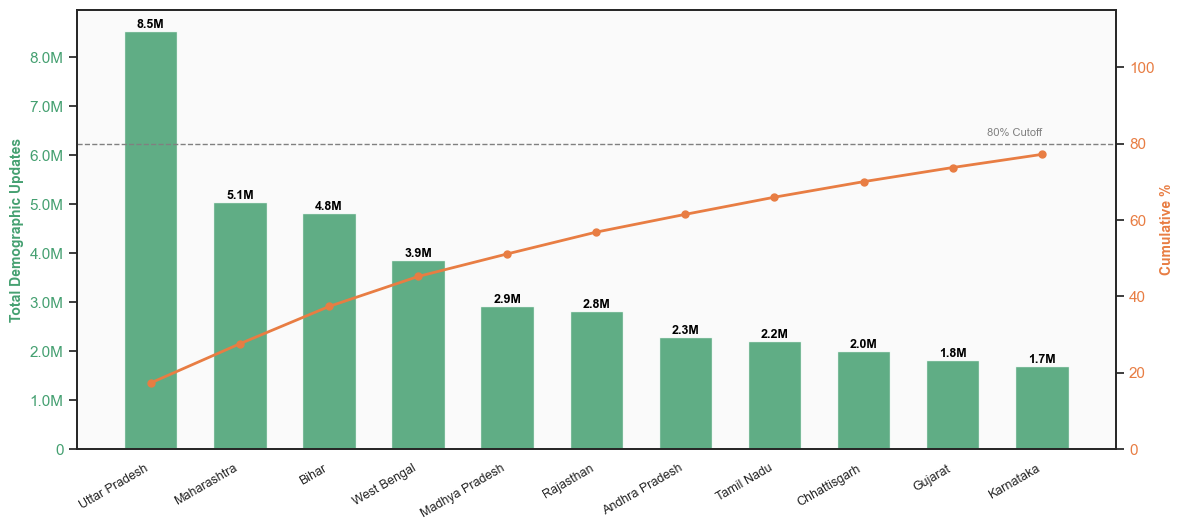

In [143]:
# --- 1. Data Preparation (Demography) ---
# Ensure date format
demography['date'] = pd.to_datetime(demography['date'])
if 'state' in demography.columns:
    demography['state'] = demography['state'].astype(str).str.strip()

# Calculate Total Updates metric
demography['total_updates'] = demography['demo_age_5_17'] + demography['demo_age_17+']

# FILTER: Entire History (March 2025 - Jan 2026)
start_date = '2025-03-01'
end_date = '2026-01-31'
mask = (demography['date'] >= start_date) & (demography['date'] <= end_date)
filtered_df = demography.loc[mask].copy()

# --- 2. Pareto Calculation ---
state_stats = filtered_df.groupby('state')['total_updates'].sum().sort_values(ascending=False)
total_volume = state_stats.sum()
cum_percent = state_stats.cumsum() / total_volume * 100

# Identify 80% Cutoff
cutoff_count = cum_percent[cum_percent <= 80].count()
if cutoff_count == 0: cutoff_count = 1
print(f"Top {cutoff_count} states contribute to ~80% of total volume.")

# Limit to Top 10 for Rigid View
top_n = 11
plot_vol = state_stats.head(top_n)
plot_cum = cum_percent.head(top_n)

# --- 3. Plotting ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define Theme Colors
bar_color = '#45A071'  # Deepened Aadhaar Green
line_color = '#E87D43' # Deepened Aadhaar Orange

# A. Bar Chart (Volume) - GREEN
bars = ax1.bar(plot_vol.index, plot_vol.values, color=bar_color, alpha=0.85, width=0.6)
ax1.set_ylabel('Total Demographic Updates', color=bar_color, fontsize=10, fontweight='bold')
ax1.set_xlabel('', fontsize=10, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=bar_color)

# Set Ticks explicitly
ax1.set_xticks(range(len(plot_vol.index)))
ax1.set_xticklabels(plot_vol.index, rotation=30, ha='right', fontsize=9)

# Format Y-axis (M/K) helper function
def human_format(num, pos=None):
    if num >= 1e6: return f'{num/1e6:.1f}M'
    if num >= 1e3: return f'{num/1e3:.0f}K'
    return f'{num:.0f}'
import matplotlib.ticker as ticker
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# --- ADD LABELS (M/K) ---
for bar in bars:
    height = bar.get_height()
    label = human_format(height)
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             label,
             ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# B. Line Chart (Cumulative %) - ORANGE (for contrast/theme)
ax2 = ax1.twinx()
ax2.plot(range(len(plot_cum)), plot_cum.values, color=line_color, marker='o', ms=5, linewidth=2)
ax2.set_ylabel('Cumulative %', color=line_color, fontsize=10, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=line_color)
ax2.set_ylim(0, 115)

# C. 80% Reference Line
ax2.axhline(80, color='grey', linestyle='--', linewidth=1)
ax2.text(len(plot_vol)-1, 82, '80% Cutoff', color='grey', ha='right', fontsize=8)

# Titles
#fig.text(x=0.08, y=0.96, s='State-wise Pareto Analysis (Top 10)', 
#         fontsize=16, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.92, s=f'Top {cutoff_count} states account for 80% of total demographic update volume', 
#         fontsize=11, color='#555555', ha='left', va='top', fontfamily='sans-serif')

plt.grid(axis='x', alpha=0.1)
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save to Demography folder
plt.savefig('Demography Images/pareto_analysis_states.png', dpi=300, bbox_inches='tight')

plt.show()